In [1]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [3]:
url = 'https://drive.google.com/file/d/1WN_JAZVHmpi_KMk4Zgyv7S3G3BekEn82/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

In [ ]:
data.info()

In [4]:
cat_ordinal = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

for col in cat_ordinal:
    data[col] = data[col].astype('category')

In [5]:
X = data.copy()
y = X.pop('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

In [ ]:
data.corrwith(data['SalePrice']).sort_values()

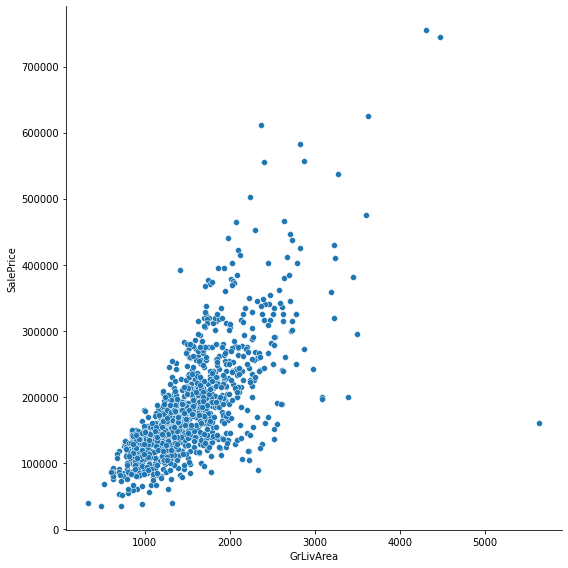

In [7]:
sns.relplot(x=X_train['GrLivArea'],y=y_train,height=8)

In [8]:
# GrLivArea * 120

dummy_model_predictions = X_test['GrLivArea'] *120
dummy_model_predictions

1260    201000
274      97920
51      141120
117     135000
789     250440
         ...  
801     143520
1292    284640
197     373440
780     150360
360     109440
Name: GrLivArea, Length: 292, dtype: int64

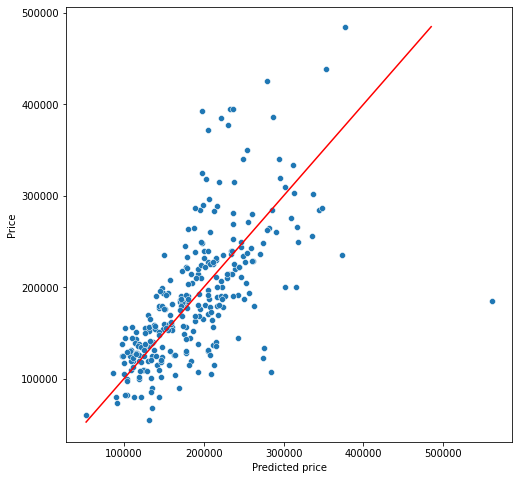

In [9]:
def plot_predictions(y_true, y_pred): 
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = min([min(y_pred.tolist()), min(y_true.tolist())])
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Price')
    plt.xlabel('Predicted price')
    plt.show()

plot_predictions(y_test, dummy_model_predictions)

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

dummy_mae = mean_absolute_error(y_true = y_test, y_pred = dummy_model_predictions)
dummy_rmse = mean_squared_error(y_true = y_test, y_pred = dummy_model_predictions, squared=False)
dummy_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dummy_model_predictions)
dummy_r2 = r2_score(y_true = y_test, y_pred = dummy_model_predictions)

In [11]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [16]:
qualities = ['None', 'TA', 'Po', 'Fa', 'Gd', 'Ex']

In [ ]:
#[qualities]*len(make_column_selector(dtype_include='category')(X_train))

In [30]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy='mean')
)
categorical_pipe_ordinal = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='None')),
    (OrdinalEncoder(categories=[qualities]*10))
)
categorical_pipe_onehot = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='NaN')),
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False))
)

In [14]:
preprocessor = make_column_transformer(
    (numeric_pipe,make_column_selector(dtype_include='number')),
    (categorical_pipe_ordinal,make_column_selector(dtype_include='category')),
    (categorical_pipe_onehot,make_column_selector(dtype_include='object'))
)

In [31]:


dt_pipeline = make_pipeline(
                            preprocessor, 
                            DecisionTreeRegressor()).set_output(transform='pandas')

dt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb370>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb520>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecbdc0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [32]:
dt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb370>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb520>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecbdc0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [33]:
dt_predictions = dt_pipeline.predict(X_test)

In [34]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [35]:
pd.DataFrame({"MAE": [dummy_mae, dt_mae],
              "RMSE": [dummy_rmse, dt_rmse],
              "MAPE": [dummy_mape, dt_mape],
              "R2": [dummy_r2, dt_r2]},
             index=["dummy_model", "decision_tree"])

,MAE,RMSE,MAPE,R2
dummy_model,38588.380137,56174.560087,0.218908,0.400337
decision_tree,27988.893836,46512.140474,0.151541,0.588887


## Add feature selection and change model

In [17]:
qualities = ['None', 'TA', 'Po', 'Fa', 'Gd', 'Ex']

In [ ]:
#[qualities]*len(make_column_selector(dtype_include='category')(X_train))

In [18]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy='mean')
)
categorical_pipe_ordinal = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='None')),
    (OrdinalEncoder(categories=[qualities]*10))
)
categorical_pipe_onehot = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='NaN')),
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False))
)

In [19]:
preprocessor = make_column_transformer(
    (numeric_pipe,make_column_selector(dtype_include='number')),
    (categorical_pipe_ordinal,make_column_selector(dtype_include='category')),
    (categorical_pipe_onehot,make_column_selector(dtype_include='object'))
)

In [37]:
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

selectfeatures = SelectFromModel(DecisionTreeRegressor())

In [38]:
scaler = StandardScaler()

In [46]:


dt2_pipeline = make_pipeline(
                            preprocessor,
                            selectfeatures, 
                            DecisionTreeRegressor()).set_output(transform='pandas')

dt2_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb370>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecbdc0>)])),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeRegressor())),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [47]:
dt2_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb370>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecbdc0>)])),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeRegressor())),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [49]:
dt2_predictions = dt2_pipeline.predict(X_test)

In [50]:
dt2_mae = mean_absolute_error(y_true = y_test, y_pred = dt2_predictions)
dt2_rmse = mean_squared_error(y_true = y_test, y_pred = dt2_predictions, squared=False)
dt2_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt2_predictions)
dt2_r2 = r2_score(y_true = y_test, y_pred = dt2_predictions)

In [52]:
scoring = pd.DataFrame({"MAE": [dt_mae, dt2_mae],
              "RMSE": [dt_rmse, dt2_rmse],
              "MAPE": [dt_mape, dt2_mape],
              "R2": [dt_r2, dt2_r2]},
             index=["dt_model", "dt2_tree"])
scoring

,MAE,RMSE,MAPE,R2
dt_model,27988.893836,46512.140474,0.151541,0.588887
dt2_tree,25617.640411,43248.615722,0.138912,0.644555
